## Plan for numerical simulations

- low-rank data generation: high dimensional, from a subset of coordinates (these are eigenvectors)
- krasulina implementation (done)
- TODO:
    - investigate robustness of the algorithm to eigenvalue perturbations
    - investigate the effect of dimension and rank
    - investigate perturbed version (optional)
    - compare to Ohad Shamir's SVRG variant of Oja's method (optional)
- Simulation on real data (candidates: MNIST, CCAT?)


In [1]:
from krasulina import KrasulinaPCA, get_random_orthogonal_initializer, get_eigenvecs
import numpy as np
import math

/Users/tcheng/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/tcheng/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi']= 300
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
%matplotlib inline

In [3]:
# data generators: data should be centered and dispersed around the subspace spanned by gt

def get_train_data(n_train, k, groundtruth=None, perturb=0):
    """
    gt: d-dimensional vec (non-increasing entries): 
    nonzero at coordinates corresponding to eigenvectors, and the value corresponds eigenvalue
    example: [1,1,0,0,0]
    return: np array train data
    """
    if not groundtruth:
        print("The data generator without groundtruth is not implemented!")
        return
    else:
        train_data = None
        d = len(groundtruth)
        for _ in range(n_train):
            x = np.zeros([1, d])
            for i in range(d):
                if groundtruth[i] > 0:
                    x[:, i] = np.random.normal(0, groundtruth[i]**0.5)
                elif perturb != 0:
                    v = k*perturb / (d-k)
                    x[:, i] = np.random.normal(0, v**0.5)
            if train_data is None:
                train_data = x
            else:
                train_data = np.concatenate((train_data, x), axis=0)  
            #print(train_data.shape)
    return train_data

In [4]:
def rotate(train_data, groundtruth):
    eigenvecs = get_eigenvecs(groundtruth)
    # get random rotation matrix
    return data_rot, eigenvecs_rot

In [5]:
## try different combinations of k, d
## k=1, 10, 50; d=100, 500, 1000

In [6]:
## for each fixed d, k, vary perturbation

In [7]:
k=1
d=100
gt = [0] * d
for i in range(k):
    gt[i] = 1
_init_weights = get_random_orthogonal_initializer(k, d)
n_train = 5000
eigenvecs = get_eigenvecs(gt)

In [8]:
_init_weights

array([[-0.0658195 , -0.09121887, -0.04498019, ...,  0.10632771,
        -0.08943787,  0.01871137],
       [ 0.00145304, -0.06217551,  0.06160185, ...,  0.1664262 ,
         0.07803559, -0.03758566],
       [ 0.00750704, -0.00639548,  0.08628903, ..., -0.06085964,
         0.03680186, -0.08055913],
       ...,
       [-0.0190741 , -0.02851426,  0.03917131, ..., -0.03639327,
        -0.09142549,  0.00460356],
       [ 0.02728887,  0.03779824, -0.03372117, ..., -0.03410528,
         0.02773056,  0.02946563],
       [-0.01104131,  0.02092904, -0.05261696, ...,  0.05988045,
        -0.01123467,  0.03647983]], dtype=float32)

In [9]:
perturb_ratio = [0, 0.01, 0.1, 0.5]
train_data = get_train_data(n_train, k, groundtruth=gt, perturb=gt[0]*perturb_ratio[3])

In [10]:
# \tau: 0.01 or smaller for d=100 ?

T = 6
lr = (None, 0.0005) 
ratio = 0.01
algo = KrasulinaPCA(_init_weights, train_data, groundtruth=eigenvecs, 
                    learning_rate=lr, max_iter=T * n_train, log_freq=ratio*n_train)

In [11]:
algo._train()

The initial mse: 339445.53252950066
The initial loss: 45.31370257586241
The loss at the 0-th epoch 50-th iteration is 45.13238847249647
The loss at the 0-th epoch 100-th iteration is 44.944015644422706
The loss at the 0-th epoch 150-th iteration is 44.76819822018146
The loss at the 0-th epoch 200-th iteration is 44.55292725454953
The loss at the 0-th epoch 250-th iteration is 44.34292520745758
The loss at the 0-th epoch 300-th iteration is 44.11402234440395
The loss at the 0-th epoch 350-th iteration is 43.88453746983617
The loss at the 0-th epoch 400-th iteration is 43.66040647603295
The loss at the 0-th epoch 450-th iteration is 43.42493525466362
The loss at the 0-th epoch 500-th iteration is 43.18487713041223
The loss at the 0-th epoch 550-th iteration is 42.940367618676405
The loss at the 0-th epoch 600-th iteration is 42.68851263178032
The loss at the 0-th epoch 650-th iteration is 42.43402997614952
The loss at the 0-th epoch 700-th iteration is 42.155742773353126
The loss at the 

The loss at the 1-th epoch 6250-th iteration is 8.041522170109072
The loss at the 1-th epoch 6300-th iteration is 7.891760749979289
The loss at the 1-th epoch 6350-th iteration is 7.7500328733347095
The loss at the 1-th epoch 6400-th iteration is 7.595059447512895
The loss at the 1-th epoch 6450-th iteration is 7.447557213422314
The loss at the 1-th epoch 6500-th iteration is 7.308190636213456
The loss at the 1-th epoch 6550-th iteration is 7.164489020486231
The loss at the 1-th epoch 6600-th iteration is 7.0363655646265935
The loss at the 1-th epoch 6650-th iteration is 6.903011353080766
The loss at the 1-th epoch 6700-th iteration is 6.769852395625236
The loss at the 1-th epoch 6750-th iteration is 6.639997681874158
The loss at the 1-th epoch 6800-th iteration is 6.514822363096414
The loss at the 1-th epoch 6850-th iteration is 6.396596135002473
The loss at the 1-th epoch 6900-th iteration is 6.282411422803864
The loss at the 1-th epoch 6950-th iteration is 6.164792359276955
The loss

The loss at the 2-th epoch 12400-th iteration is 1.1779118211797839
The loss at the 2-th epoch 12450-th iteration is 1.165894768933382
The loss at the 2-th epoch 12500-th iteration is 1.1477085020667772
The loss at the 2-th epoch 12550-th iteration is 1.1319470928897435
The loss at the 2-th epoch 12600-th iteration is 1.114053313214196
The loss at the 2-th epoch 12650-th iteration is 1.098601864343419
The loss at the 2-th epoch 12700-th iteration is 1.083659943414652
The loss at the 2-th epoch 12750-th iteration is 1.0728164895302585
The loss at the 2-th epoch 12800-th iteration is 1.0557413322730844
The loss at the 2-th epoch 12850-th iteration is 1.0466382901041267
The loss at the 2-th epoch 12900-th iteration is 1.039640731270128
The loss at the 2-th epoch 12950-th iteration is 1.0273027986048526
The loss at the 2-th epoch 13000-th iteration is 1.0121528920741008
The loss at the 2-th epoch 13050-th iteration is 0.999573675750703
The loss at the 2-th epoch 13100-th iteration is 0.987

The loss at the 3-th epoch 18400-th iteration is 0.41367599260433185
The loss at the 3-th epoch 18450-th iteration is 0.41185031702229724
The loss at the 3-th epoch 18500-th iteration is 0.41203645210077855
The loss at the 3-th epoch 18550-th iteration is 0.4115562567545672
The loss at the 3-th epoch 18600-th iteration is 0.41231672813520626
The loss at the 3-th epoch 18650-th iteration is 0.41119040617462277
The loss at the 3-th epoch 18700-th iteration is 0.41147143250923934
The loss at the 3-th epoch 18750-th iteration is 0.4117860283030257
The loss at the 3-th epoch 18800-th iteration is 0.4104746421938932
The loss at the 3-th epoch 18850-th iteration is 0.41115778569007755
The loss at the 3-th epoch 18900-th iteration is 0.4102744156795676
The loss at the 3-th epoch 18950-th iteration is 0.41042023308856546
The loss at the 3-th epoch 19000-th iteration is 0.41037335986020396
The loss at the 3-th epoch 19050-th iteration is 0.4112402914359453
The loss at the 3-th epoch 19100-th ite

The loss at the 4-th epoch 24400-th iteration is 0.39853688198753123
The loss at the 4-th epoch 24450-th iteration is 0.39818064931730013
The loss at the 4-th epoch 24500-th iteration is 0.3977971254786731
The loss at the 4-th epoch 24550-th iteration is 0.3992636559060907
The loss at the 4-th epoch 24600-th iteration is 0.3981148387952822
The loss at the 4-th epoch 24650-th iteration is 0.3981411663530996
The loss at the 4-th epoch 24700-th iteration is 0.3973579048877679
The loss at the 4-th epoch 24750-th iteration is 0.39617994368379317
The loss at the 4-th epoch 24800-th iteration is 0.3956487044779372
The loss at the 4-th epoch 24850-th iteration is 0.3953548147435323
The loss at the 4-th epoch 24900-th iteration is 0.393990277333522
The loss at the 4-th epoch 24950-th iteration is 0.3954737071497195
Finished training 5-th epoch with total 25000 iterations
The current learning rate is 0.0005
The loss at the 5-th epoch 25000-th iteration is 0.39557253843857954
The loss at the 5-th

In [14]:
algo_list = []

In [15]:
algo_list.append(algo)

In [16]:
eps = 1e-8
#iterations = range(int(2*T/ratio)+1)
#frac_iterations = [ratio * t for t in iterations]

In [17]:
log_error_list = []
error_list = []
for trained_algo in algo_list:
    #log_iterations = [math.log(t+1) for t in iterations]
    log_error_list.append([math.log(y+eps) for y in trained_algo._groundtruth_eval_log])
    error_list.append(trained_algo._groundtruth_eval_log)

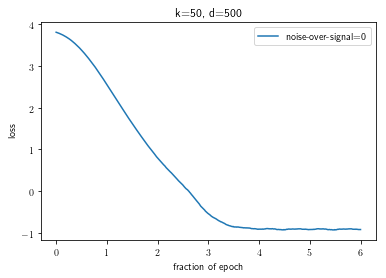

In [20]:
for idx, error_log in enumerate(log_error_list):
    number_of_iters = len(error_log)
    frac_iterations = [ratio * t for t in range(number_of_iters)]
    plt.plot(frac_iterations, error_log, label=f'noise-over-signal={perturb_ratio[idx]}')
    plt.legend()
    plt.xlabel('fraction of epoch')
    plt.ylabel('loss')
    plt.title(f'k={k}, d={d}')
    plt.savefig(f'k{k}_d{d}.png')

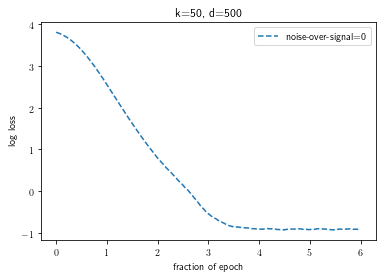

In [19]:
for idx, log_error in enumerate(log_error_list):
    number_of_iters = len(log_error)
    frac_iterations = [ratio * t for t in range(number_of_iters)]
    plt.plot(frac_iterations, log_error, '--', label=f'noise-over-signal={perturb_ratio[idx]}')
    plt.legend()
    plt.xlabel('fraction of epoch')
    plt.ylabel('log loss')
    plt.title(f'k={k}, d={d}')
    plt.savefig(f'k{k}_d{d}_logloss.png')